In [1]:
import numpy as np
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [2]:
# Paths
MODEL_PATH = "./Models2"
os.makedirs(MODEL_PATH, exist_ok=True)

In [3]:
# Load Dataset
df = pd.read_csv("E:/Box Office Revenue Prediction/Datasets/preparedDataset.csv")

In [4]:
# Preprocess Data and Split into Train and Test
from feature_scaling2 import prepare_features  # Replace with your preprocessing logic
X, y = prepare_features(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



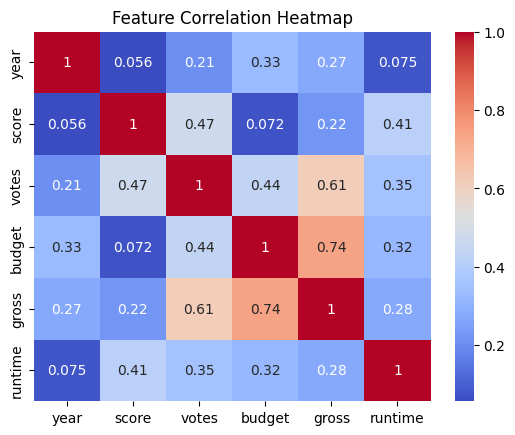

In [5]:
# Visualizing Correlation Matrix
NUMERICAL_FEATURES = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[NUMERICAL_FEATURES].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Train Random Forest with Cross-Validation
param_grid = {
    "n_estimators": [100],
    "max_depth": [10],
    "min_samples_split": [10],
    "min_samples_leaf": [5],
    "max_features": ["sqrt","log2"],
    "bootstrap": [False],
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", grid_search.best_params_)


e:\Box Office Revenue Prediction\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [7]:
# Best Model
rf_model = grid_search.best_estimator_


In [8]:
# Evaluate Model
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation Scores (Training): {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

metrics = {
    "Training": {
        "R2": r2_score(y_train, y_train_pred),
        "MSE": mean_squared_error(y_train, y_train_pred),
        "MAPE": mean_absolute_percentage_error(y_train, y_train_pred) * 100,
    },
    "Test": {
        "R2": r2_score(y_test, y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_test_pred) * 100,
    },
}
print("Random Forest Metrics:", metrics)

Cross-Validation Scores (Training): [0.69935126 0.68366959 0.68695485 0.71224703 0.64731029]
Average CV Score: 0.6859
Random Forest Metrics: {'Training': {'R2': 0.8552857504809674, 'MSE': np.float64(0.5075597025501261), 'MAPE': np.float64(3.165108831104843)}, 'Test': {'R2': 0.7181534790018365, 'MSE': np.float64(1.063251363183427), 'MAPE': np.float64(4.698077222378268)}}


In [9]:
# Save Model
joblib.dump(rf_model, os.path.join(MODEL_PATH, "random_forest_model3.pkl"))
print(f"Random Forest model saved to {MODEL_PATH}")


Random Forest model saved to ./Models2


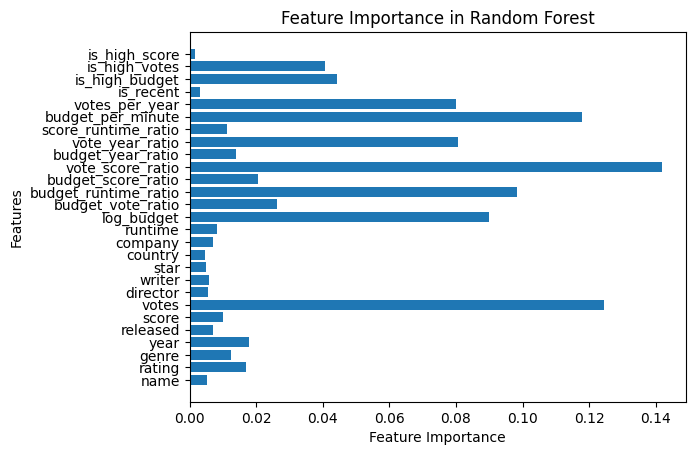

In [10]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()